In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk 
nltk.download('punkt')
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

UsageError: Line magic function `%` not found.


In [5]:
df = pd.read_csv('newreviews.csv')

In [6]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.shape

(568454, 10)

In [9]:
df = df.sample(frac=0.20,replace=True).reset_index(drop=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44633,B001EQ55RW,A2065HBMYDXJ1S,"Jenn B ""Happy Mom""",0,0,5,1212019200,Great crunchy snack,"Great taste, great snack. Very fresh, tastes g..."
1,153955,B005VOOM2W,A1H7Y5XKPGT0OS,"Rama Rao ""Rama""",0,0,4,1335052800,Coffee that hits the spot,This product makes a great cup of coffee. Just...
2,264810,B0051UTHUI,A22RZ8WH4VIPQ,gratheeus,1,1,5,1329868800,So rich and chocolaty!,"This is excellent fudge. Or should I say, this..."
3,326029,B001GHYO5I,A5P1SG8UVA9GD,Bruce C. Baumeister,12,14,5,1226102400,use it all the time,"My mother cooked with it, and I regularly cook..."
4,167718,B004VNTTKY,ATB8Y1N0QWD08,aprilwheelis,1,1,5,1315785600,Great item!,I have a little indoor grill and am always loo...


In [10]:
df.shape

(113691, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113690 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113689 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 6.5+ MB


In [12]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [15]:
# What is the distribution of ratings across dataset
rating_pct=df['Score'].value_counts()/len(df)*100
rating_pct

5    63.736718
4    14.319013
1     9.323763
3     7.501231
2     5.119274
Name: Score, dtype: float64

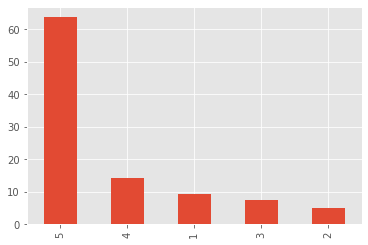

In [16]:
rating_pct.plot.bar()
plt.show()

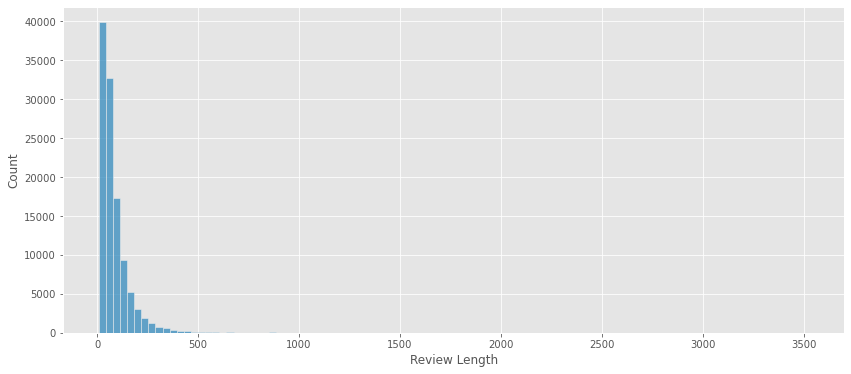

In [18]:
#words per review
plt.figure(figsize=(14,6))
WordsPerReview=df['Text'].apply(lambda x:len(x.split(' ')))

sns.histplot(WordsPerReview,bins=100)

plt.xlabel('Review Length')
plt.show()

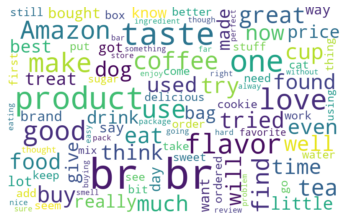

In [21]:
txt=' '.join(review for review in df.Text)

wordcloud=WordCloud(
                    background_color='white',
                    max_font_size=100,
                    max_words=100,
                    width=800,
                    height=500
                   ).generate(txt)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
df=pd.DataFrame(df,columns=['Score','Text'])
df.rename(columns={'Score':'Rating','Text':'Review'},inplace=True)

In [23]:
def apply_sentiment(Rating):
    if(Rating<=2):
        return 0
    else: 
        return 1

In [24]:
df['Sentiment']=df['Rating'].apply(apply_sentiment)
df.drop(['Rating'],axis=1,inplace=True)

In [25]:
sentiment=df['Sentiment'].value_counts()
sentiment

1    97268
0    16420
Name: Sentiment, dtype: int64

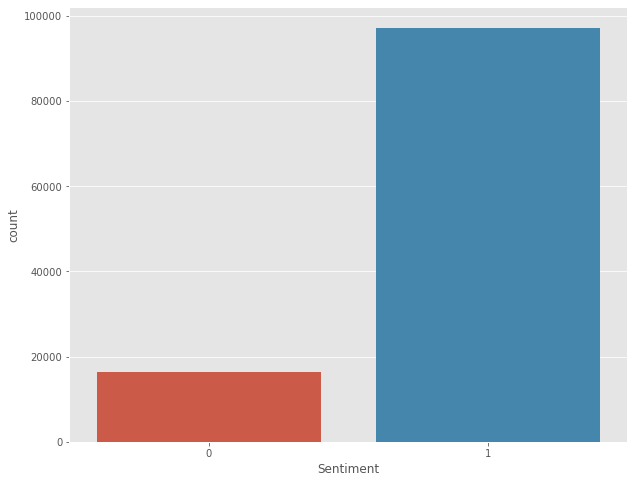

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Sentiment')
plt.show()

In [28]:
def clean_text(Review):
    
    Review=str(Review).lower()# convert to lowercase
    Review=re.sub('\[.*?\]','',Review)
    Review=re.sub('https?://\S+|www\.\S+','',Review)# Remove URls
    Review=re.sub('<.*?>+','',Review)
    Review=re.sub(r'[^a-z0-9\s]','',Review)# Remove punctuation
    Review=re.sub('\n','',Review)
    Review=re.sub('\w*\d\w*','',Review)
    return Review

In [29]:
df['Review']=df['Review'].apply(clean_text)

In [30]:
df.head()

,Review,Sentiment
0,great taste great snack very fresh tastes good...,1
1,this product makes a great cup of coffee just ...,1
2,this is excellent fudge or should i say this w...,1
3,my mother cooked with it and i regularly cook ...,1
4,i have a little indoor grill and am always loo...,1


In [32]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
stopword=[]
sentence=df['Review'][0]


#words = nltk.word_tokenize(sentence)

def remove_stopword(stop_words,sentence):
    return[word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df['reviews_text']=df['Review'].apply(lambda row: remove_stopword(stop_words,row))

In [33]:
df.head(3)

,Review,Sentiment,reviews_text
0,great taste great snack very fresh tastes good...,1,"[great, taste, great, snack, fresh, tastes, go..."
1,this product makes a great cup of coffee just ...,1,"[product, makes, great, cup, coffee, pour, boi..."
2,this is excellent fudge or should i say this w...,1,"[excellent, fudge, say, excellent, fudge, cant..."


In [34]:
X=df.reviews_text.astype(str)
y=df.Sentiment.astype(str)

In [35]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,
                                               test_size=0.20)

X_train.shape,X_test.shape,y_train.shape

((90950,), (22738,), (90950,))

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
pipeline = Pipeline([('vect', CountVectorizer(stop_words= "english",
                                              lowercase=True)),
                     ('tfidf', TfidfTransformer(use_idf = True, 
                                                smooth_idf = True)),
                     ('clf', MultinomialNB(alpha =1)),])


In [45]:
fit_model=pipeline.fit(X_train,y_train)

In [46]:
print('Training accuracy:',fit_model.score(X_train,y_train))
print('Test accuracy:',fit_model.score(X_test,y_test))

Training accuracy: 0.8584606926882903
Test accuracy: 0.8551763567596095
